In [2]:
import pandas as pd
votes = pd.read_csv('F:/education/data quest/machine learning sessions/114_congresss/114_congress.csv')
votes.head(5)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [4]:
votes["party"].value_counts()


R    54
D    44
I     2
Name: party, dtype: int64

In [5]:
votes.mean()

00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

In [7]:
from sklearn.metrics.pairwise import euclidean_distances

distance = euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[2,3:].values.reshape(1, -1))
distance

array([[3.31662479]])

In [9]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:,3:])
senator_distances

array([[3.12141628, 1.3134775 ],
       [2.6146248 , 2.05339992],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [1.43833966, 2.96866004],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [0.31287498, 3.30758755],
       [0.33960656, 3.41651746],
       [3.27058526, 0.96734144],
       [0.33960656, 3.41651746],
       [3.34875646, 0.53945585],
       [0.33960656, 3.41651746],
       [1.18084816, 3.12695614],
       [1.23852221, 3.13536063],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [2.6146248 , 2.05339992],
       [0.58487332, 3.31421108],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.56324683, 0.93036231],
       [3.42004795, 0.24198446],
       [1.73847904, 2.82326711],
       [0.33960656, 3.41651746],
       [3.

In [14]:
np.info(senator_distances)

class:  ndarray
shape:  (100, 2)
strides:  (16, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x25fa0af1510
byteorder:  little
byteswap:  False
type: float64


Considering there are two cluster points we have the labels according to the point which is closer to the cluster

In [11]:
labels = kmeans_model.labels_
labels

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [13]:
import numpy as np
np.info(labels)

class:  ndarray
shape:  (100,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x25f98256580
byteorder:  little
byteswap:  False
type: int32


In [15]:
labels = kmeans_model.labels_
pd.crosstab(labels, votes["party"])

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


To get Independant candidates who belong to first cluster

In [18]:
votes[(labels==0) &  (votes["party"]=="I")]

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
50,King,I,ME,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
79,Sanders,I,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


All senators belonging to second sector and  who are democrats

In [20]:
democratic_outliers = votes[(labels == 1)& (votes["party"]=="D")]
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


Lets visualize  clusters using matplotlib

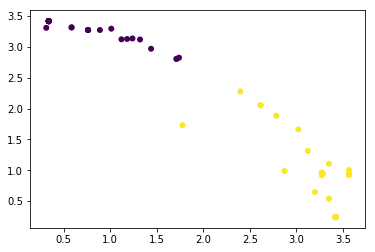

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
x = senator_distances[:,0]
y = senator_distances[:,1]

plt.scatter(x,y,linewidths =0,c=labels)
plt.show()

One way to diffrentiate between Extremist and Moderates would be to analyse the senator distances. If a senator is very close to one cluster and very far away from another then he is an extrimist.

To make these distances more clear we can either square or cube them and then decide some range to come to settlement

In [27]:
extremism = (senator_distances ** 3).sum(axis=1)
votes["extremism"] = extremism
votes.sort_values("extremism", inplace=True, ascending=False)
print(votes.head(10))

         name party state  00001  00004  00005  00006  00007  00008  00009  \
98     Wicker     R    MS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
53   Lankford     R    OK    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
69       Paul     R    KY    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
80      Sasse     R    NE    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
26       Cruz     R    TX    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
48    Johnson     R    WI    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
47    Isakson     R    GA    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
65  Murkowski     R    AK    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
64      Moran     R    KS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
30       Enzi     R    WY    0.0    1.0    1.0    1.0    1.0    0.0    1.0   

    00010  00020  00026  00032  00038  00039  00044  00047  extremism  
98    0.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.250476